In [1]:
from numba import cuda
from numba import vectorize

In [2]:
import numpy as np
import cv2

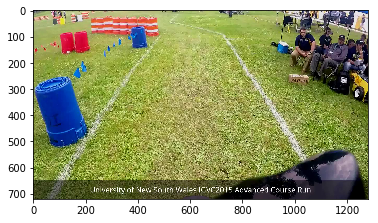

In [163]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
cap = cv2.VideoCapture("IGVC_2015_Speed_Record.mp4")
ret, frame = cap.read()
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
# gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_image,cmap="gray")

# hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# plt.imshow(hsv)


In [161]:
gray_image.shape

(720, 1280)

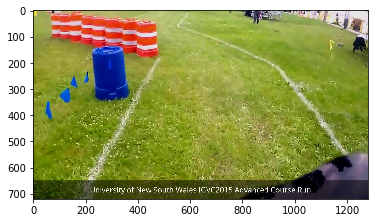

In [139]:
for i in range(100):
    ret, frame = cap.read()
# frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

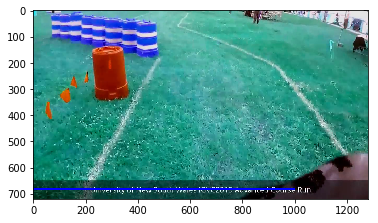

In [158]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
lower_white = np.array([0,0,50], dtype=np.uint8)
upper_white = np.array([180, 50, 255], dtype=np.uint8)
white_mask = cv2.inRange(hsv, lower_white, upper_white)
# res = cv2.bitwise_and(frame,frame, mask= mask)
lower_blue = np.array([110,0,0])
upper_blue = np.array([180,255,255])

lower_green = np.array([50, 0, 0])
upper_green = np.array([100, 255, 255]) 
green_mask = cv2.inRange(hsv, lower_green, upper_green) # I have the Green threshold image.

# Threshold the HSV image to get only blue colors
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
# mask = white_mask + (255 - blue_mask) + (255- green_mask)
res = cv2.bitwise_and(frame,frame, mask= white_mask)
edges = cv2.Canny(res,5,5)
lines = cv2.HoughLines(edges,1,np.pi/20,20)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(frame,(x1,y1),(x2,y2),(0,0,255),2)
# plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.imshow(frame)
# plt.imshow(edges,cmap='gray')


In [150]:
edges.shape

(720, 1280)

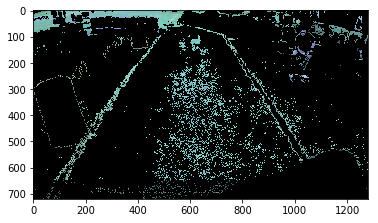

In [101]:
res = cv2.bitwise_and(res,res, mask= 255-blue_mask)
plt.imshow(res)

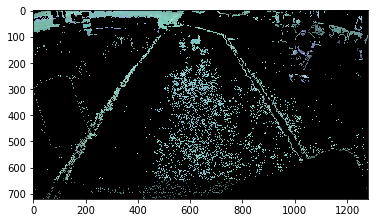

In [102]:
res = cv2.bitwise_and(res,res, mask= 255-green_mask)
plt.imshow(res)

In [99]:
green_mask[0:1,0:1] - blue_mask[0:1,0:1]

array([[1]], dtype=uint8)

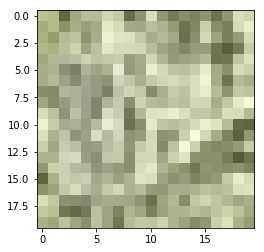

In [17]:
a = frame[520:540,170:190,:]
# a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

plt.imshow(a)


[177.7825, 192.92250000000001, 192.73249999999999]

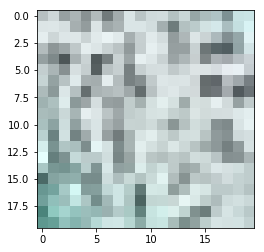

In [41]:
a = frame[520:540,1000:1020,:]
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.imshow(a)
[a[...,i].mean() for i in range(a.shape[-1])]

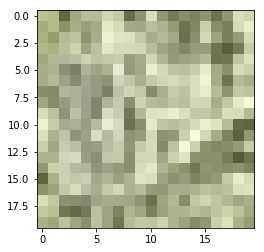

In [32]:
a = frame[520:540,170:190,:]
[a[...,i].mean() for i in range(a.shape[-1])]

[173.345, 178.185, 145.16499999999999]

In [27]:
frame[510:550,160:200,:]

array([[[ 84, 101,  91],
        [ 47,  64,  54],
        [149, 173, 122],
        ..., 
        [162, 171, 123],
        [154, 165, 109],
        [168, 179, 123]],

       [[156, 173, 163],
        [147, 164, 154],
        [148, 172, 121],
        ..., 
        [126, 135,  87],
        [148, 159, 103],
        [202, 213, 157]],

       [[199, 221, 154],
        [202, 224, 157],
        [164, 186, 115],
        ..., 
        [ 77,  86,  38],
        [110, 124,  65],
        [196, 210, 151]],

       ..., 
       [[123, 129,  88],
        [119, 125,  84],
        [197, 200, 169],
        ..., 
        [141, 158,  64],
        [133, 150,  54],
        [151, 168,  72]],

       [[199, 205, 166],
        [215, 221, 182],
        [243, 246, 215],
        ..., 
        [165, 182,  88],
        [184, 201, 105],
        [138, 155,  59]],

       [[231, 237, 198],
        [231, 237, 198],
        [232, 235, 204],
        ..., 
        [128, 145,  51],
        [176, 193,  97],
        [148, 165,

In [ ]:
plt.imshow(frame[500:700,100:200,:])

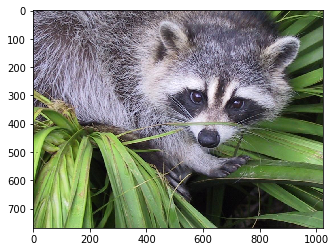

In [4]:
from scipy import misc
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [6]:
f.shape

(768L, 1024L, 3L)

In [15]:
50*2.55

127.49999999999999